In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
current_dir = os.getcwd()

current_dir

'c:\\Users\\franc\\Desktop\\Proyecto_Peliculas\\notebooks'

In [3]:
base_dir = os.path.dirname(current_dir)

base_dir

'c:\\Users\\franc\\Desktop\\Proyecto_Peliculas'

In [4]:
file_path = os.path.join(base_dir, 'data', 'ETL_data', 'movies_dataset', 'movies.parquet')

file_path

'c:\\Users\\franc\\Desktop\\Proyecto_Peliculas\\data\\ETL_data\\movies_dataset\\movies.parquet'

In [5]:
movies_df = pd.read_parquet(file_path, engine='fastparquet')

movies_df.iloc[0]

budget                                                        30000000
id                                                                 862
original_language                                                   en
overview             Led by Woody, Andy's toys live happily in his ...
popularity                                                   21.946943
release_date                                       1995-10-30 00:00:00
revenue                                                      373554033
runtime                                                           81.0
status                                                        Released
tagline                                                           None
title                                                        Toy Story
vote_average                                                       7.7
vote_count                                                        5415
release_year                                                      1995
return

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             45376 non-null  int64         
 1   id                 45376 non-null  object        
 2   original_language  45365 non-null  object        
 3   overview           44435 non-null  object        
 4   popularity         45376 non-null  float64       
 5   release_date       45376 non-null  datetime64[ns]
 6   revenue            45376 non-null  int64         
 7   runtime            45130 non-null  float64       
 8   status             45296 non-null  object        
 9   tagline            20398 non-null  object        
 10  title              45376 non-null  object        
 11  vote_average       45376 non-null  float64       
 12  vote_count         45376 non-null  int64         
 13  release_year       45376 non-null  int32         
 14  return

In [7]:
movies_df['status'].value_counts()

status
Released           44936
Rumored              230
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

In [8]:
peliculas_estrenadas = movies_df[movies_df['status'] == 'Released']

peliculas_estrenadas['status'].value_counts()

status
Released    44936
Name: count, dtype: int64

In [9]:
peliculas_estrenadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44936 entries, 0 to 45375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             44936 non-null  int64         
 1   id                 44936 non-null  object        
 2   original_language  44926 non-null  object        
 3   overview           44029 non-null  object        
 4   popularity         44936 non-null  float64       
 5   release_date       44936 non-null  datetime64[ns]
 6   revenue            44936 non-null  int64         
 7   runtime            44696 non-null  float64       
 8   status             44936 non-null  object        
 9   tagline            20287 non-null  object        
 10  title              44936 non-null  object        
 11  vote_average       44936 non-null  float64       
 12  vote_count         44936 non-null  int64         
 13  release_year       44936 non-null  int32         
 14  return     

In [10]:
peliculas_estrenadas.reset_index(inplace=True, drop=True)

peliculas_estrenadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44936 entries, 0 to 44935
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             44936 non-null  int64         
 1   id                 44936 non-null  object        
 2   original_language  44926 non-null  object        
 3   overview           44029 non-null  object        
 4   popularity         44936 non-null  float64       
 5   release_date       44936 non-null  datetime64[ns]
 6   revenue            44936 non-null  int64         
 7   runtime            44696 non-null  float64       
 8   status             44936 non-null  object        
 9   tagline            20287 non-null  object        
 10  title              44936 non-null  object        
 11  vote_average       44936 non-null  float64       
 12  vote_count         44936 non-null  int64         
 13  release_year       44936 non-null  int32         
 14  return

In [11]:
peliculas_estrenadas = peliculas_estrenadas.rename(columns={'id': 'movie_id'})

peliculas_estrenadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44936 entries, 0 to 44935
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             44936 non-null  int64         
 1   movie_id           44936 non-null  object        
 2   original_language  44926 non-null  object        
 3   overview           44029 non-null  object        
 4   popularity         44936 non-null  float64       
 5   release_date       44936 non-null  datetime64[ns]
 6   revenue            44936 non-null  int64         
 7   runtime            44696 non-null  float64       
 8   status             44936 non-null  object        
 9   tagline            20287 non-null  object        
 10  title              44936 non-null  object        
 11  vote_average       44936 non-null  float64       
 12  vote_count         44936 non-null  int64         
 13  release_year       44936 non-null  int32         
 14  return

In [12]:
current_dir = os.getcwd()

current_dir

'c:\\Users\\franc\\Desktop\\Proyecto_Peliculas\\notebooks'

In [13]:
base_dir = os.path.dirname(current_dir)

base_dir

'c:\\Users\\franc\\Desktop\\Proyecto_Peliculas'

In [14]:
file_path = os.path.join(base_dir, 'data', 'ETL_data', 'movies_dataset', 'genres.parquet')

file_path

'c:\\Users\\franc\\Desktop\\Proyecto_Peliculas\\data\\ETL_data\\movies_dataset\\genres.parquet'

In [18]:
genres_df = pd.read_parquet(file_path, engine='fastparquet')

genres_df.head()

genre_id genre_name movie_id
0       16  Animation      862
1       35     Comedy      862
2    10751     Family      862
3       12  Adventure     8844
4       14    Fantasy     8844

In [19]:
movies_and_genres_df = peliculas_estrenadas.merge(genres_df, on='movie_id', how='inner')

movies_and_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90443 entries, 0 to 90442
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             90443 non-null  int64         
 1   movie_id           90443 non-null  object        
 2   original_language  90431 non-null  object        
 3   overview           89408 non-null  object        
 4   popularity         90443 non-null  float64       
 5   release_date       90443 non-null  datetime64[ns]
 6   revenue            90443 non-null  int64         
 7   runtime            90194 non-null  float64       
 8   status             90443 non-null  object        
 9   tagline            46376 non-null  object        
 10  title              90443 non-null  object        
 11  vote_average       90443 non-null  float64       
 12  vote_count         90443 non-null  int64         
 13  release_year       90443 non-null  int32         
 14  return

In [20]:
columnas_a_analizar = movies_and_genres_df[['overview',
                                            'popularity',
                                            'runtime',
                                            'tagline',
                                            'title',
                                            'vote_average',
                                            'vote_count',
                                            'genre_name']]

columnas_a_analizar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90443 entries, 0 to 90442
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   overview      89408 non-null  object 
 1   popularity    90443 non-null  float64
 2   runtime       90194 non-null  float64
 3   tagline       46376 non-null  object 
 4   title         90443 non-null  object 
 5   vote_average  90443 non-null  float64
 6   vote_count    90443 non-null  int64  
 7   genre_name    90443 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 5.5+ MB


In [21]:
columnas_numericas = columnas_a_analizar.select_dtypes(include=[np.number])

columnas_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90443 entries, 0 to 90442
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    90443 non-null  float64
 1   runtime       90194 non-null  float64
 2   vote_average  90443 non-null  float64
 3   vote_count    90443 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 2.8 MB


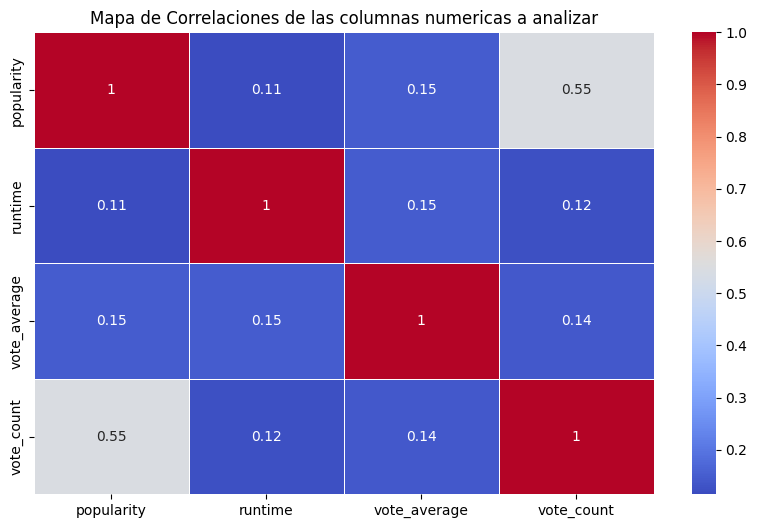

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(columnas_numericas.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlaciones de las columnas numericas a analizar')
plt.show()

In [23]:
columnas_a_analizar['genre_name'].value_counts()

genre_name
Drama              20112
Comedy             13090
Thriller            7581
Romance             6677
Action              6553
Horror              4639
Crime               4290
Documentary         3867
Adventure           3485
Science Fiction     3025
Family              2747
Mystery             2461
Fantasy             2302
Animation           1923
Foreign             1591
Music               1590
History             1391
War                 1320
Western             1038
TV Movie             761
Name: count, dtype: int64

In [24]:
columnas_de_texto = columnas_a_analizar.select_dtypes(include=object)

columnas_de_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90443 entries, 0 to 90442
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overview    89408 non-null  object
 1   tagline     46376 non-null  object
 2   title       90443 non-null  object
 3   genre_name  90443 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [35]:
data_nueva = {category: [] for category in columnas_de_texto['name_genre'].unique()}

In [36]:
data_nueva

{'Animation': [],
 'Comedy': [],
 'Family': [],
 'Adventure': [],
 'Fantasy': [],
 'Romance': [],
 'Drama': [],
 'Action': [],
 'Crime': [],
 'Thriller': [],
 'Horror': [],
 'History': [],
 'Science Fiction': [],
 'Mystery': [],
 'War': [],
 'Foreign': [],
 'Music': [],
 'Documentary': [],
 'Western': [],
 'TV Movie': []}

In [37]:
columnas_de_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90443 entries, 0 to 90442
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overview    89408 non-null  object
 1   tagline     46376 non-null  object
 2   title       90443 non-null  object
 3   name_genre  90443 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [38]:
for index, row in columnas_de_texto.iterrows():
    data_nueva[row['name_genre']].extend([row['overview'], row['tagline'], row['title']])

In [39]:
generos = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data_nueva.items()]))

In [40]:
generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60336 entries, 0 to 60335
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Animation        4548 non-null   object
 1   Comedy           32034 non-null  object
 2   Family           6918 non-null   object
 3   Adventure        9059 non-null   object
 4   Fantasy          5839 non-null   object
 5   Romance          16695 non-null  object
 6   Drama            49007 non-null  object
 7   Action           16943 non-null  object
 8   Crime            11146 non-null  object
 9   Thriller         19876 non-null  object
 10  Horror           12414 non-null  object
 11  History          3369 non-null   object
 12  Science Fiction  8001 non-null   object
 13  Mystery          6329 non-null   object
 14  War              3282 non-null   object
 15  Foreign          3474 non-null   object
 16  Music            4005 non-null   object
 17  Documentary      8827 non-null 

In [41]:
generos.fillna('', inplace=True)

In [42]:
generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60336 entries, 0 to 60335
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Animation        60336 non-null  object
 1   Comedy           60336 non-null  object
 2   Family           60336 non-null  object
 3   Adventure        60336 non-null  object
 4   Fantasy          60336 non-null  object
 5   Romance          60336 non-null  object
 6   Drama            60336 non-null  object
 7   Action           60336 non-null  object
 8   Crime            60336 non-null  object
 9   Thriller         60336 non-null  object
 10  Horror           60336 non-null  object
 11  History          60336 non-null  object
 12  Science Fiction  60336 non-null  object
 13  Mystery          60336 non-null  object
 14  War              60336 non-null  object
 15  Foreign          60336 non-null  object
 16  Music            60336 non-null  object
 17  Documentary      60336 non-null

In [43]:
def generate_wordcloud(column_data, column_name):
    text = ' '.join(column_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {column_name}')
    plt.axis('off')
    plt.show()

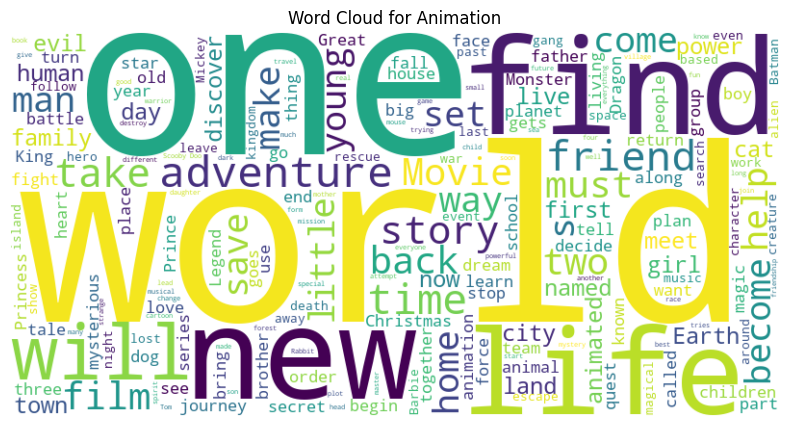

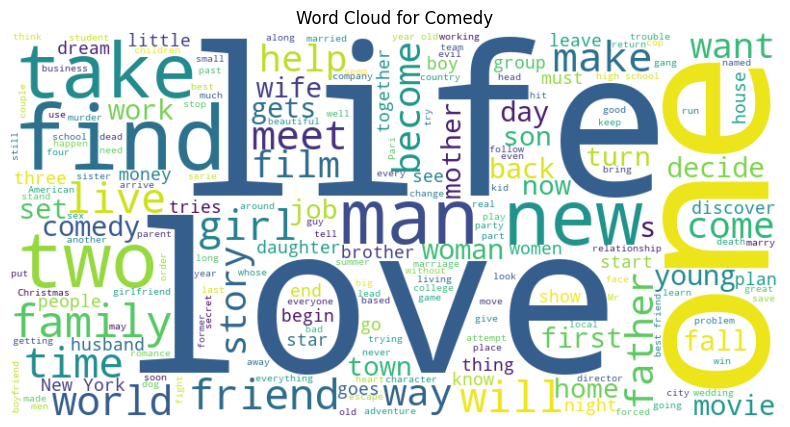

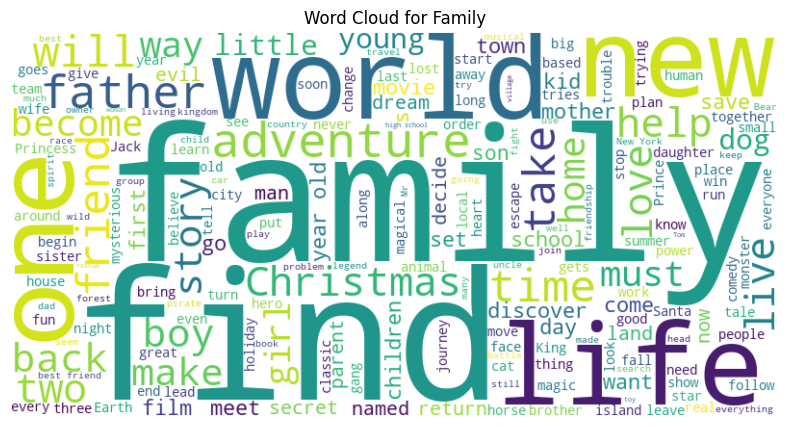

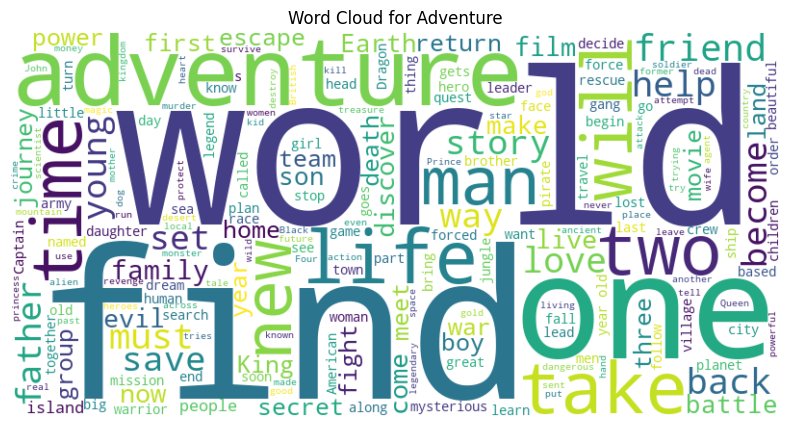

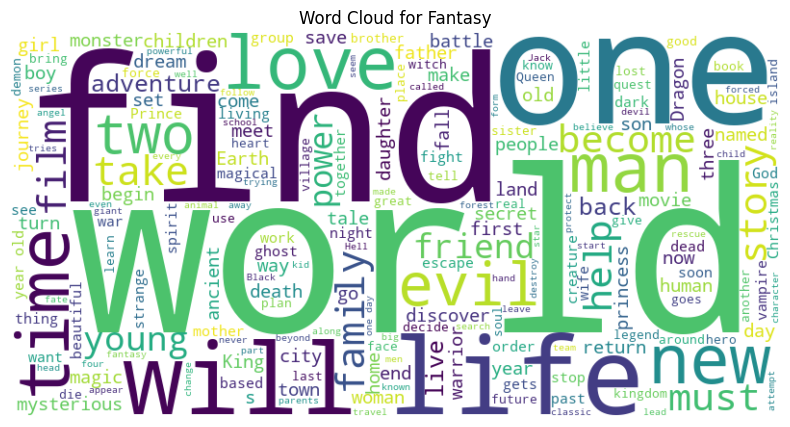

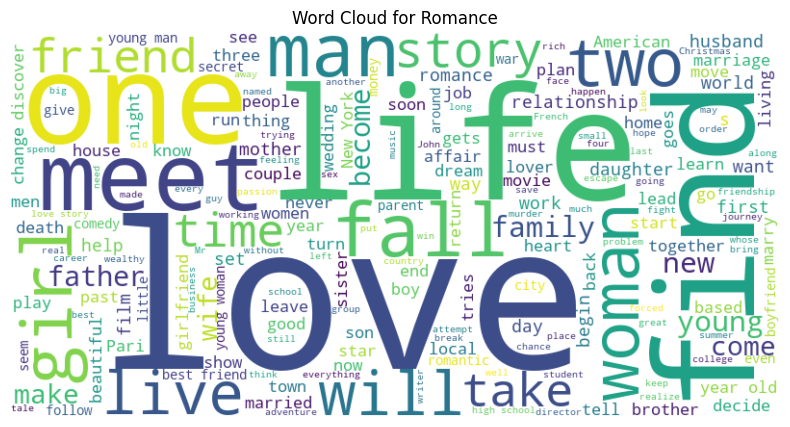

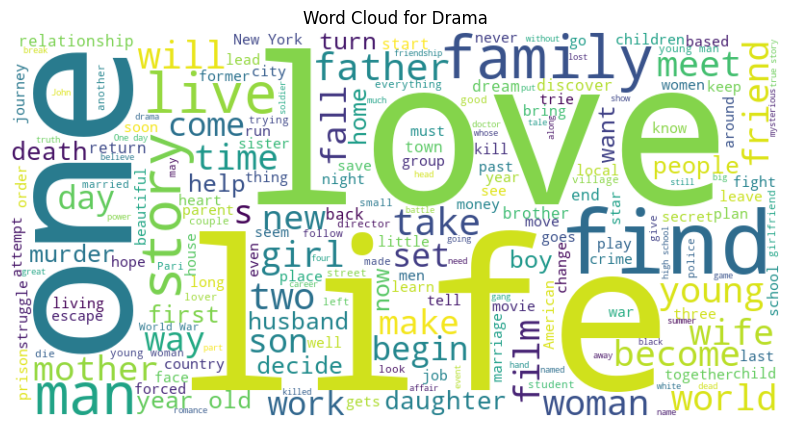

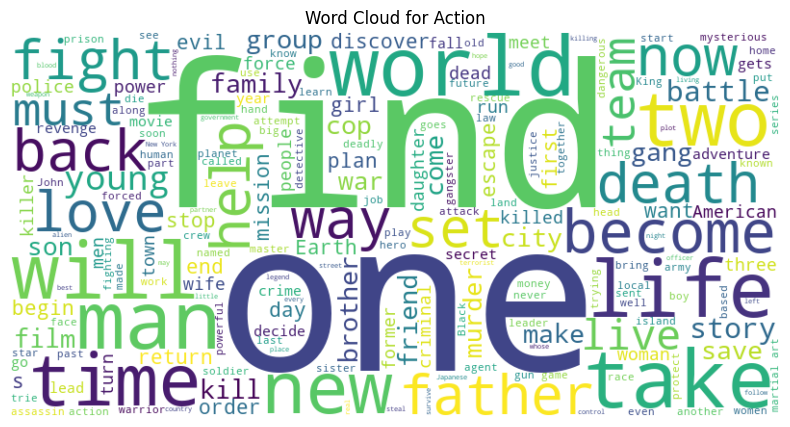

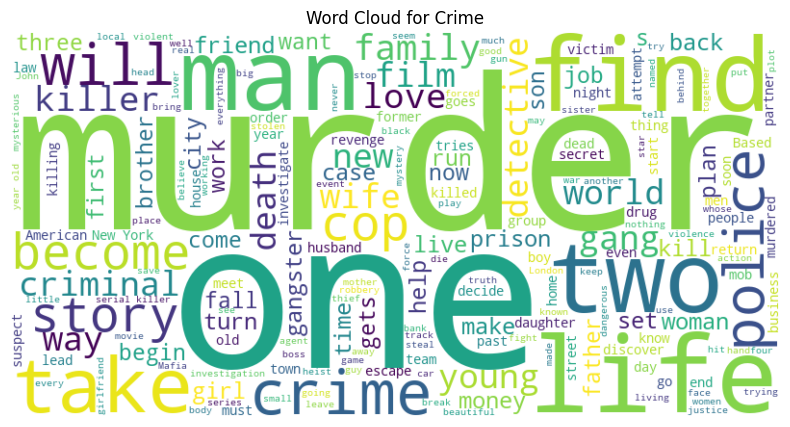

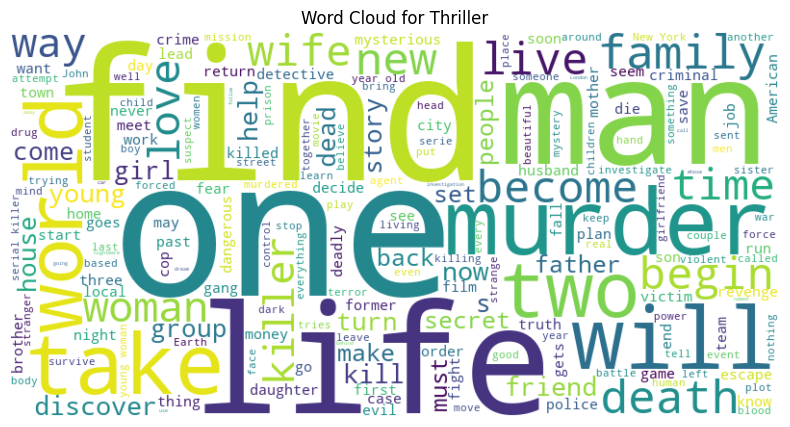

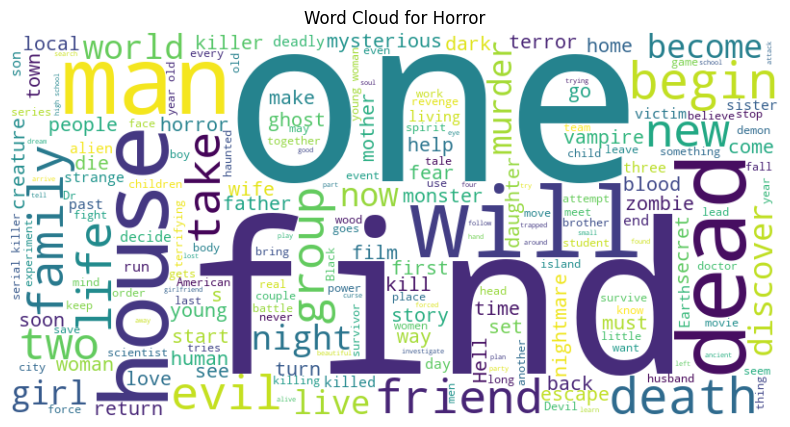

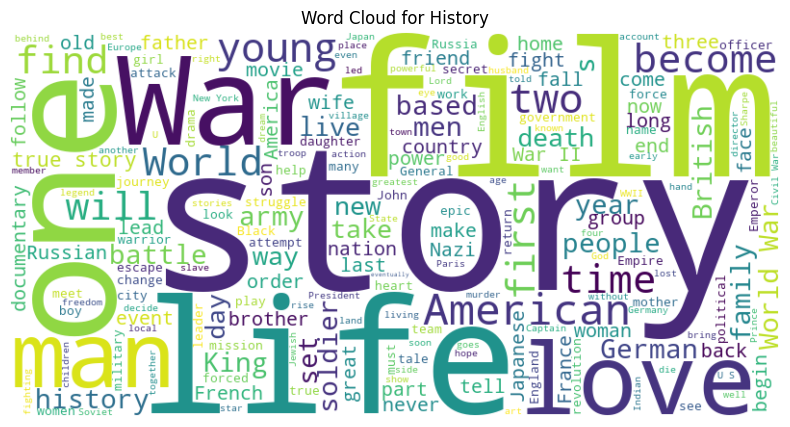

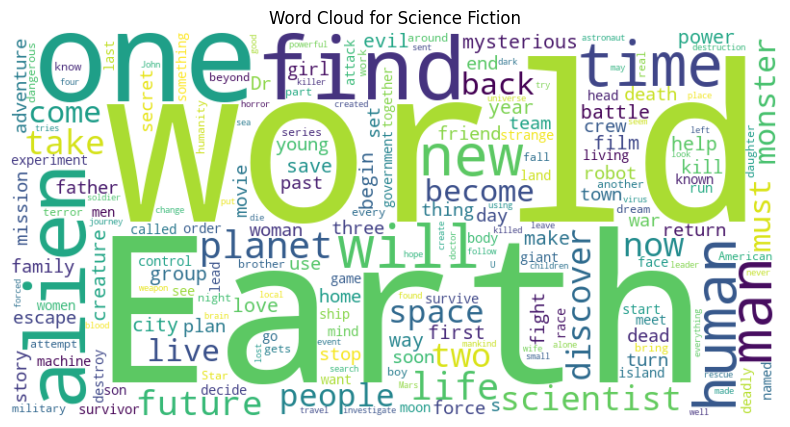

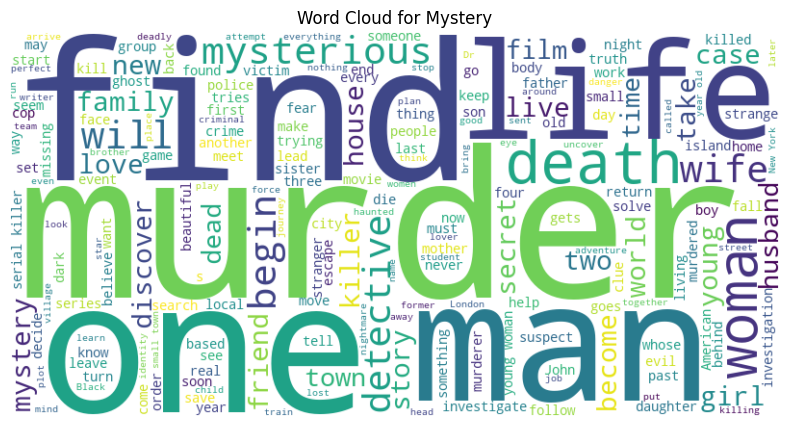

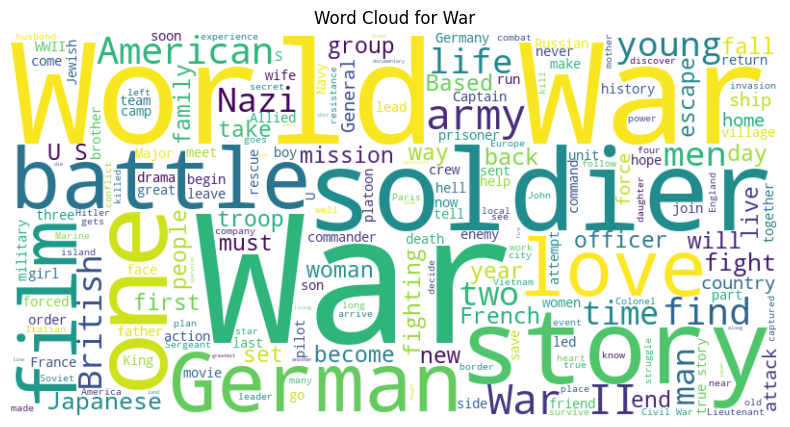

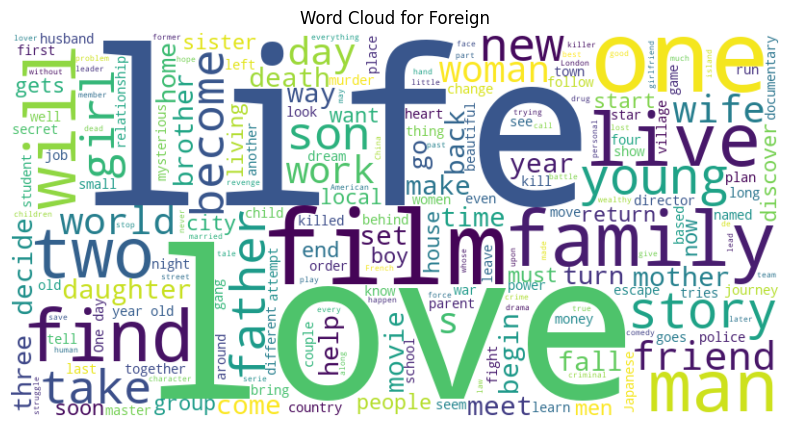

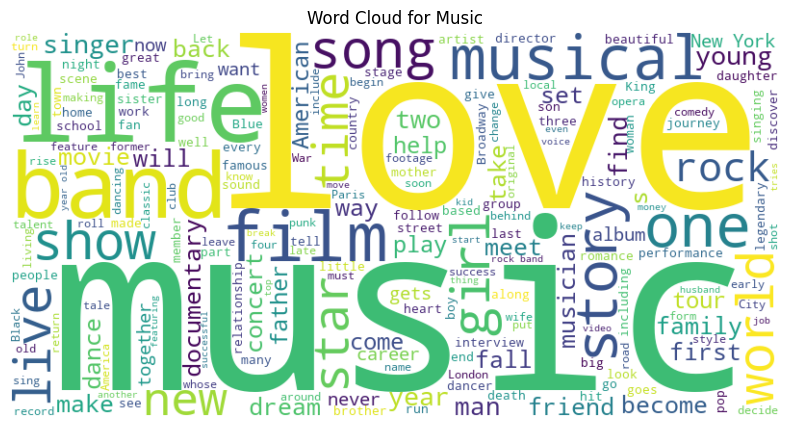

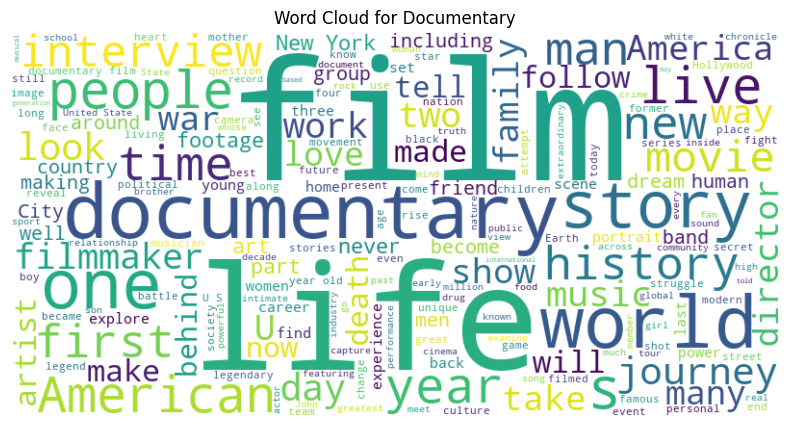

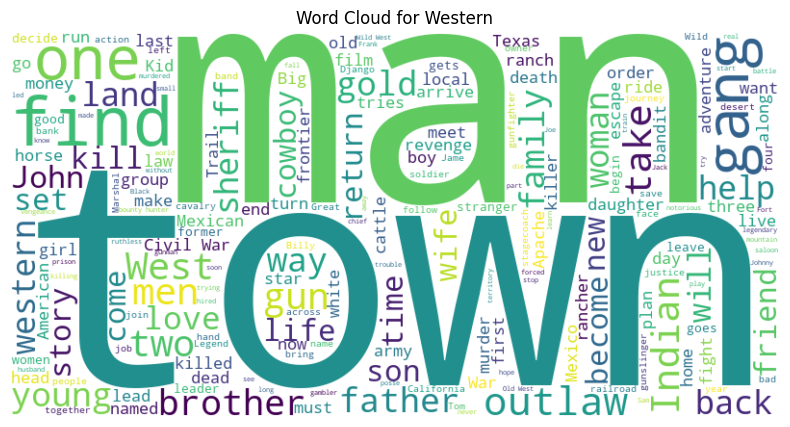

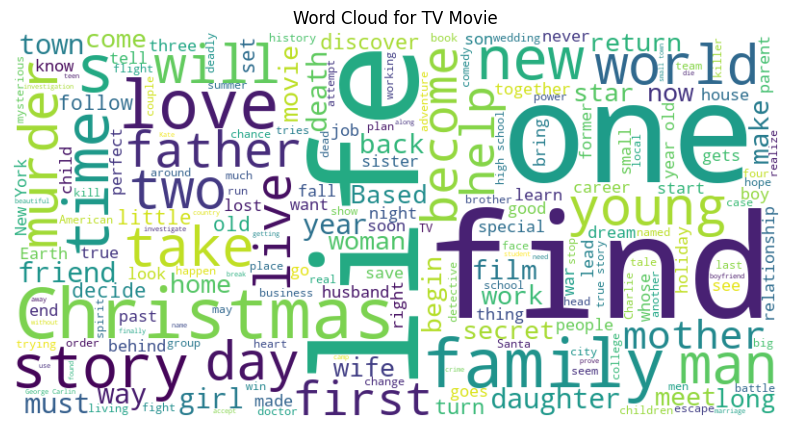

In [44]:
for column in generos.columns:
    if generos[column].dtype == 'object':
        generate_wordcloud(generos[column], column)

In [45]:
columnas_de_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90443 entries, 0 to 90442
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overview    89408 non-null  object
 1   tagline     46376 non-null  object
 2   title       90443 non-null  object
 3   name_genre  90443 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [46]:
textos = columnas_de_texto.fillna('')

In [47]:
textos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90443 entries, 0 to 90442
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overview    90443 non-null  object
 1   tagline     90443 non-null  object
 2   title       90443 non-null  object
 3   name_genre  90443 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [48]:
columns = [col for col in textos.columns if col != 'name_genre'] + ['name_genre']
textos = textos[columns]

In [49]:
textos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90443 entries, 0 to 90442
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overview    90443 non-null  object
 1   tagline     90443 non-null  object
 2   title       90443 non-null  object
 3   name_genre  90443 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [50]:
textos['combined_text'] = textos[textos.columns[:-1]].apply(lambda x: ' '.join(x), axis=1)

In [51]:
textos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90443 entries, 0 to 90442
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   overview       90443 non-null  object
 1   tagline        90443 non-null  object
 2   title          90443 non-null  object
 3   name_genre     90443 non-null  object
 4   combined_text  90443 non-null  object
dtypes: object(5)
memory usage: 3.5+ MB


In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(textos['combined_text'])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, textos['name_genre'], test_size=0.2, random_state=42)

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [60]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.2585549228813091


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(textos['combined_text'])

In [69]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=50)  # Reducir a 50 componentes principales
X_reduced = pca.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, textos['name_genre'], test_size=0.2, random_state=42)

In [74]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.13903477251368235


In [77]:
textos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90443 entries, 0 to 90442
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   overview       90443 non-null  object
 1   tagline        90443 non-null  object
 2   title          90443 non-null  object
 3   name_genre     90443 non-null  object
 4   combined_text  90443 non-null  object
dtypes: object(5)
memory usage: 3.5+ MB


In [78]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna 'label' sea la última
columns = [col for col in textos.columns if col != 'name_genre'] + ['name_genre']
textos = textos[columns]

# Concatenar todas las columnas de texto en una sola columna
textos['combined_text'] = textos[textos.columns[:-1]].apply(lambda x: ' '.join(x), axis=1)

# Vectorización de texto con TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(textos['combined_text'])
y = textos['name_genre']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

Accuracy: 0.27182265465199845


c:\Users\franc\Desktop\Proyecto_Peliculas\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\franc\Desktop\Proyecto_Peliculas\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\franc\Desktop\Proyecto_Peliculas\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

                 precision    recall  f1-score   support

         Action       0.16      0.14      0.15      1321
      Adventure       0.11      0.06      0.08       692
      Animation       0.13      0.04      0.07       392
         Comedy       0.30      0.39      0.34      2657
          Crime       0.11      0.05      0.07       831
    Documentary       0.60      0.51      0.55       787
          Drama       0.30      0.63      0.41      3974
         Family       0.12      0.05      0.07       536
        Fantasy       0.07      0.02      0.03       447
        Foreign       0.00      0.00      0.00       316
        History       0.11      0.00      0.01       285
         Horror       0.32      0.28      0.30       921
          Music       0.22      0.09      0.12       314
        Mystery       0.09      0.02      0.03       489
        Romance       0.13      0.04      0.07      1389
Science Fiction       0.23      0.18      0.20       624
       TV Movie       0.00    

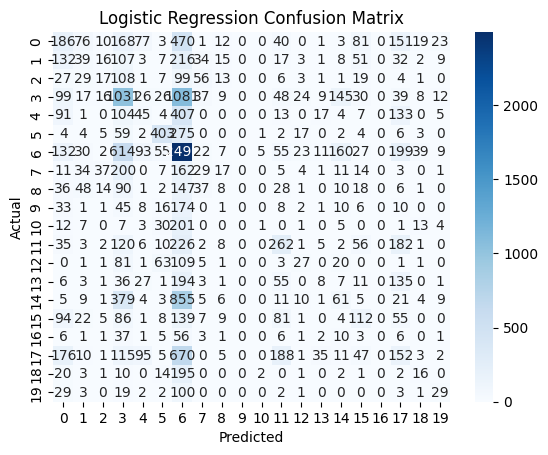

In [80]:
# Predicción y evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()